In [1]:
%matplotlib inline
import pandas
import matplotlib
import matplotlib.pyplot as plt

DATA_FILE_PATH = 'NYPD_Complaint_Data_Current_YTD.csv'

In [2]:
fullData = pandas.read_csv(DATA_FILE_PATH, sep=',')
fullData['COUNT'] = 1
harassmentData = fullData[(fullData['PD_DESC'].str.contains("HARASSMENT")==True) & (fullData['CMPLNT_FR_DT'].str.contains("2016")==True)].sort_values(['CMPLNT_FR_DT'])
harassmentData['CMPLNT_FR_DT']  = pandas.to_datetime(harassmentData['CMPLNT_FR_DT'])
#harassmentData

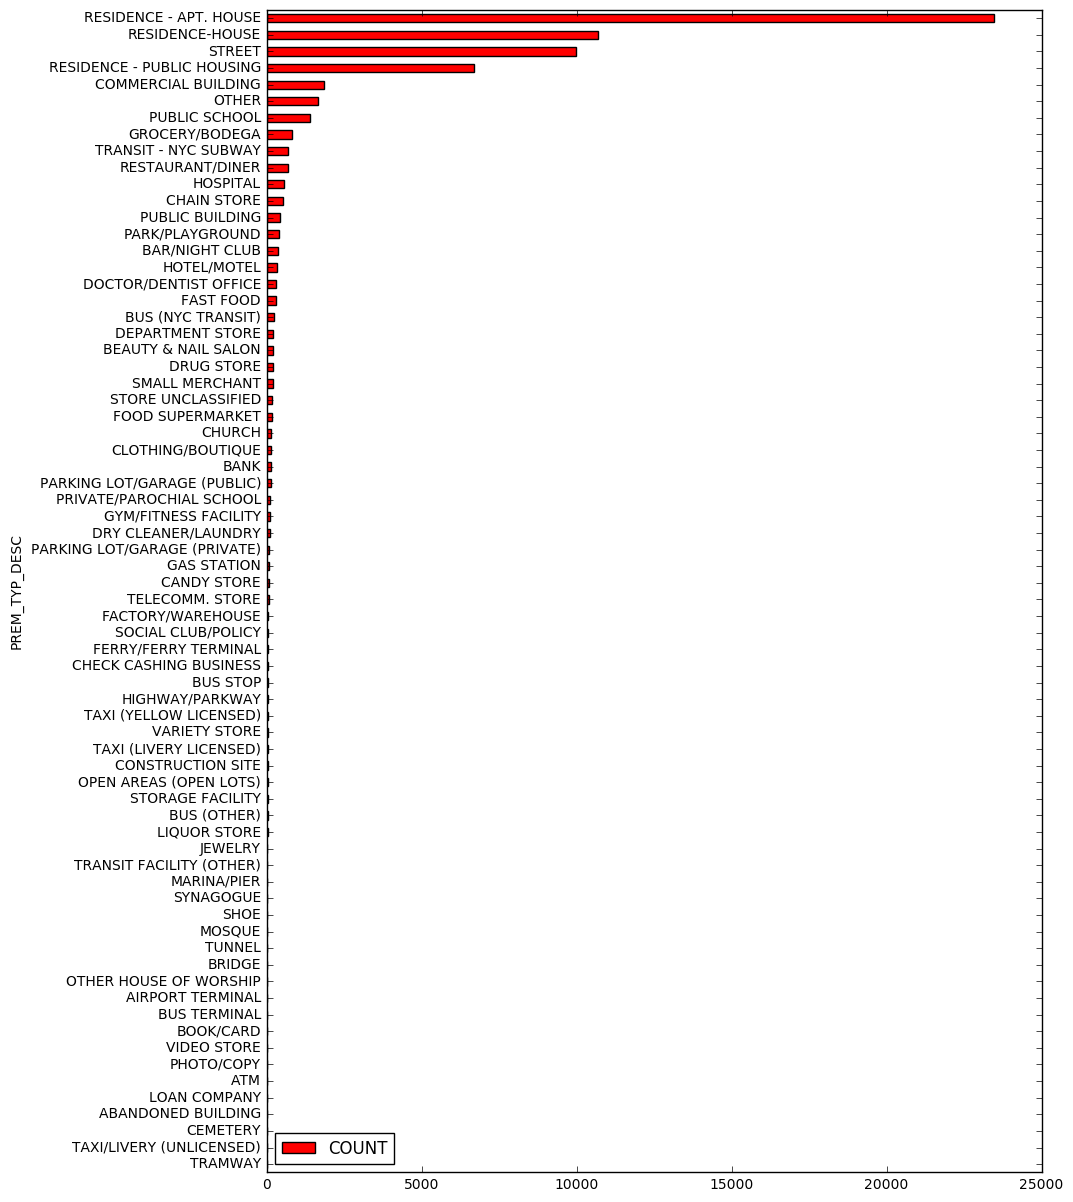

In [92]:
plt.rcParams["figure.figsize"] = [10,15]
harassmentDataTotals = pandas.DataFrame(harassmentData.groupby(['PREM_TYP_DESC'])['COUNT'].sum())
harassmentDataTotals = harassmentDataTotals.sort_values(['COUNT'], ascending=False)
#harassmentDataTotals = harassmentDataTotals.head(n=50)
descArr = harassmentDataTotals.reset_index()['PREM_TYP_DESC'].tolist()
harassmentDataTotals = harassmentDataTotals.sort_values(['COUNT'], ascending=True)
harassmentDataTotals.plot.barh(facecolor='r');

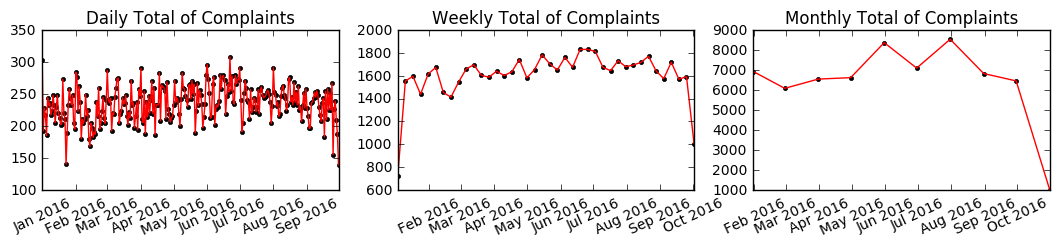

In [93]:
plt.rcParams["figure.figsize"] = [13,7]
harassmentDataTimeSeries = pandas.DataFrame(harassmentData.groupby(['CMPLNT_FR_DT','PREM_TYP_DESC'])['COUNT'].sum()).reset_index()
harassmentDataTimeSeries = harassmentDataTimeSeries.sort_values(['CMPLNT_FR_DT'])
monthlyHarassmentDataTimeSeries = harassmentDataTimeSeries.set_index('CMPLNT_FR_DT')
monthlyHarassmentDataTimeSeries = monthlyHarassmentDataTimeSeries.resample("D").sum()
plt.subplot(3, 3, 1)
plt.xticks(rotation=25)
plt.plot(monthlyHarassmentDataTimeSeries, 'k.', monthlyHarassmentDataTimeSeries, 'r-')
plt.title('Daily Total of Complaints')
monthlyHarassmentDataTimeSeries = monthlyHarassmentDataTimeSeries.resample("W").sum()
plt.subplot(3, 3, 2)
plt.xticks(rotation=25)
plt.plot(monthlyHarassmentDataTimeSeries, 'k.', monthlyHarassmentDataTimeSeries, 'r-')
plt.title('Weekly Total of Complaints')
monthlyHarassmentDataTimeSeries = monthlyHarassmentDataTimeSeries.resample("M").sum()
plt.subplot(3, 3, 3)
plt.xticks(rotation=25)
plt.plot(monthlyHarassmentDataTimeSeries, 'k.', monthlyHarassmentDataTimeSeries, 'r-')
plt.title('Monthly Total of Complaints')

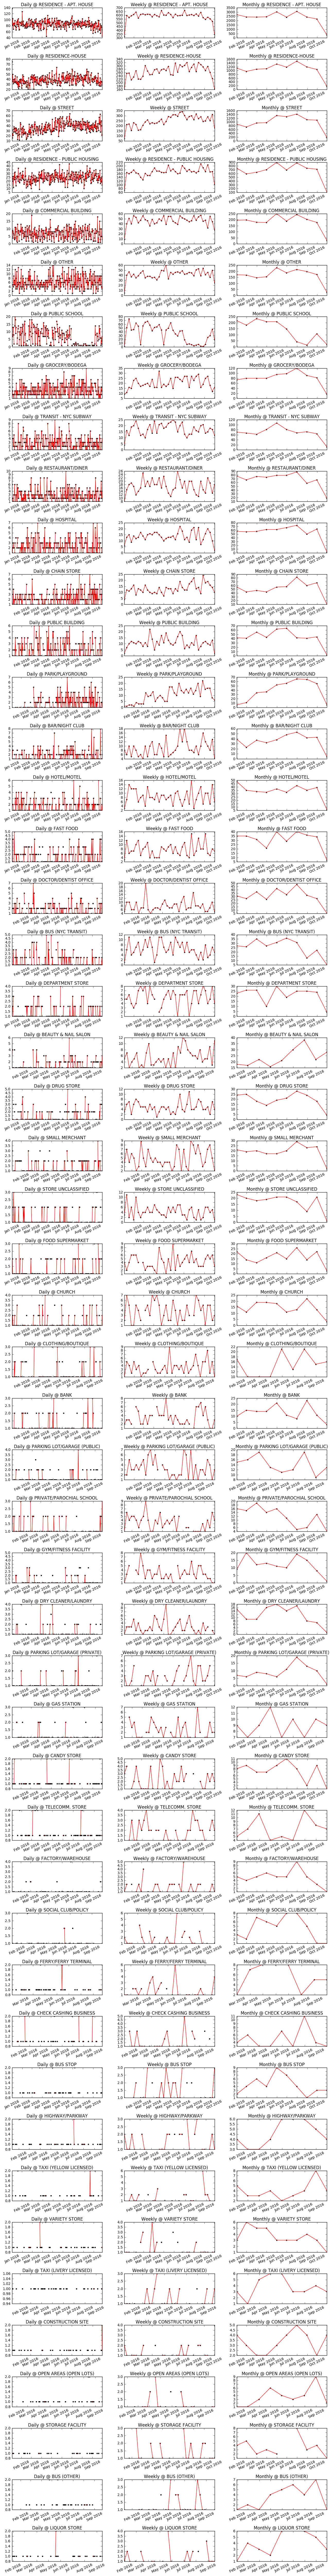

In [90]:
plt.rcParams["figure.figsize"] = [13,len(descArr)*2]

i = 1
for desc in descArr:
    tempDF = pandas.DataFrame(harassmentDataTimeSeries[(harassmentDataTimeSeries['PREM_TYP_DESC'] == desc)]) 
    tempDF = tempDF.set_index('CMPLNT_FR_DT')
    tempDF = tempDF.resample("D").sum()
    plt.subplot(len(descArr), 3, i)
    plt.tight_layout()
    plt.plot(tempDF, 'k.', tempDF, 'r-')
    plt.title('Daily @ ' + desc)
    plt.xticks(rotation=25)
    i+=1
    tempDF = tempDF.resample("W").sum()
    plt.subplot(len(descArr), 3, i)
    plt.plot(tempDF, 'k.', tempDF, 'r-')
    plt.title('Weekly @ ' + desc)
    plt.xticks(rotation=25)
    i+=1
    tempDF = tempDF.resample("M").sum()
    plt.subplot(len(descArr), 3, i)
    plt.plot(tempDF, 'k.', tempDF, 'r-')
    plt.title('Monthly @ ' + desc)
    plt.xticks(rotation=25)
    i+=1